<a href="https://colab.research.google.com/github/anshud28/Step-PG/blob/main/Final_edits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
!pip install opencv-python
!pip install pandas
import cv2
import pandas as pd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt

In [ ]:
#connect to google drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


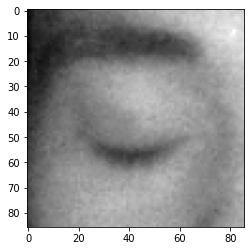

In [ ]:
# Load the Drive helper and mount
img_array = cv2.imread('/content/drive/MyDrive/Dataset/Drowsiness/train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap="gray")

In [ ]:
img_array.shape

(86, 86)

In [ ]:
import os

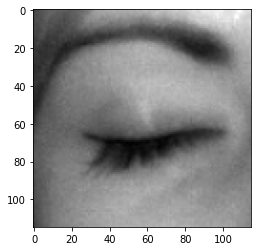

In [ ]:
Datadirectory = r'/content/drive/MyDrive/Dataset/Drowsiness/train'
Classes = ['Closed_Eyes', 'Open_Eyes']
# Datadirectory = 'dataset_new/train/'
# Classes = ['Closed', 'Open']
for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

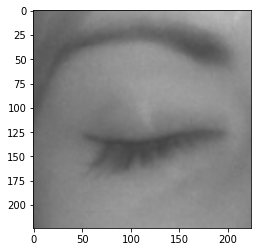

In [ ]:
#Resizing the image to standard size
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [ ]:
training_data = []

def create_training_data():
  for category in Classes:
      path = os.path.join(Datadirectory, category)
      class_num = Classes.index(category)
      for img in os.listdir(path):
        try :
           img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
           backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
           new_array = cv2.resize(backtorgb, (img_size,img_size))
           training_data.append([new_array, class_num])
        except Exception as e:
          pass

In [ ]:
create_training_data()
print(len(training_data))

4000


In [ ]:
import random
random.shuffle(training_data)
#here we reshape the image.
X = []
y = []
for features, label in training_data:
  X.append(features)
  y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [ ]:
X.shape
(4000, 224, 224, 3)
X = X/255.0
Y = np.array(y)

In [ ]:
#Checking installation of tensorflow for training
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

     |████████████████████████████████| 462 kB 4.3 MB/s 


In [ ]:

!pip install cython h5py --user

In [ ]:
#creating instance for neural network model
model = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 1s 0us/step


In [ ]:
model.summary()


Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
base_input = model.layers[0].input
base_output = model.layers[-4].output

In [ ]:
#Flattening layers 
#Calling activation function for classification purposes

Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
#creating a new instance of the model to fit the data
new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])


In [ ]:
new_model.fit(X,Y, epochs = 2, validation_split = 0.1)

Epoch 1/2
113/113 [==============================] - 53s 344ms/step - loss: 0.0289 - accuracy: 0.9872 - val_loss: 0.5092 - val_accuracy: 0.8850
Epoch 2/2
113/113 [==============================] - 37s 330ms/step - loss: 0.0171 - accuracy: 0.9975 - val_loss: 1.1860e-05 - val_accuracy: 1.0000


In [ ]:
#saving my trained model
new_model.save('my_model.h5')

In [ ]:
#Loading my trained model
new_model = tf.keras.models.load_model('my_model.h5')

Real-time analysis starts here

In [ ]:
def start_camera():
  cap = cv2.VideoCapture(0) # using default camera
  cap.set(3,640) # width is id no 3
  cap.set(4,480) # height is id no 4
  cap.set(10,100) # Brightness id is 10
  counter=0
  frame_check=20
  i=0  #Frame_Counter
  while True:
    success, img = cap.read()
    if success==False:
      print('Camera opening failed')
      break
    cv2.imwrite('/content/drive/MyDrive/Dataset/Drowsiness/Live/live'+str(i)+'.png',img)
    #cv2.imshow("Output",img)
    img_array = cv2.imread('/content/drive/MyDrive/Dataset/Drowsiness/Live/live'+str(i)+'.png' , cv2.IMREAD_GRAYSCALE)
    i+=1
    backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
    new_array = cv2.resize(backtorgb, (img_size, img_size))   #resize

    X_input = np.array(new_array).reshape(1, img_size, img_size, 3)  #reshape
    #Prediction
    prediction = my_predict(X_input)
    if prediction == 'closed':
      counter+=1
      #if counter >= frame_check:
			  #cv2.putText(img, "****************ALERT!****************", (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
				#cv2.putText(img, "****************ALERT!****************", (10,325),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    else:
      counter=0
 
    cv2.imshow("Frame", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
      cv2.destroyAllWindows()
      cap.release()
      break

In [ ]:
#taking in image for testing
#img_array = cv2.imread('/content/drive/MyDrive/Dataset/Drowsiness/unit_test/unit_1.png',cv2.IMREAD_GRAYSCALE)
#backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
#new_array = cv2.resize(backtorgb, (img_size, img_size))


In [ ]:
#X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [ ]:
#X_input.shape

In [ ]:
#plt.imshow(new_array)


In [ ]:
#Prediction 
def my_predict(X_input):
  X_input = X_input/255.0  #To get a value between 0 - 1
  prediction_val = new_model.predict(X_input)
  if prediction_val <=0.1:
    prediction="closed"
  elif prediction_val >=0.9:
    prediction="Opened"

  return (prediction)

In [ ]:
def main():
  while True:
    choice= input('Start driving? (yes/no): ')
    if choice=='yes' or choice=='Yes':
      start_camera()
    elif choice =='no' or choice == 'No':
      print('Bye!')
      break
    else:
      print('Wrong input.')

if __name__ == "__main__":
    main()

Start driving? (yes/no): yes
Camera opening failed
Start driving? (yes/no):  no
Wrong input.
Start driving? (yes/no): no
Bye!


In [ ]:
#prediction

'Opened'